In [93]:
from pysr import PySRRegressor
import kan
import torch
import numpy as np
from libraries import tfim_functions
import matplotlib.pyplot as plt
import sympy
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
import kan.utils as ku

In [3]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = ku.create_dataset(f, n_var=2, device=device)
print(dataset['train_input'].shape, dataset['train_label'].shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [5]:
X = dataset['train_input']
y = dataset['train_label'].reshape(1000)
print(X.shape, y.shape)

torch.Size([1000, 2]) torch.Size([1000])


In [15]:
model = PySRRegressor(
    maxsize=20,
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [16]:
model.fit(X, y)

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.600e+05
Progress: 929 / 1240 total iterations (74.919%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.049e+00  0.000e+00  y = 1.835
2           1.905e+00  7.261e-02  y = exp(x₀)
3           1.380e+00  3.227e-01  y = x₀ + 1.836
4           1.377e+00  1.998e-03  y = sin(x₀) + 1.8373
5           1.054e+00  2.679e-01  y = exp(sin(x₀ * 2.9755))
6           8.710e-01  1.902e-01  y = sin(x₀ * 3.0656) + 1.854
7           5.567e-01  4.477e-01  y = exp(sin(x₀ * 3.1969) + 0.39351)
9           3.402e-14  1.521e+01  y = exp((x₁ * x₁) + sin(x₀ * 3.1416))
13          3.061e-14  2.644e-02  y = exp(sin((x₀ * 1.0168e-05) + (x₀ * 3.1416)) + (x₁ * x₁)...
                                      )
20          3.058e-14  1.327e-04  y = exp(sin((x₀ * 3.1416) + ((((x₁

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          1.8349518   
	1         0.072610                                            exp(x0)   
	2         0.322661                                     x0 + 1.8360459   
	3         0.001998                                sin(x0) + 1.8372648   
	4         0.267870                             exp(sin(x0 * 2.97553))   
	5         0.190244                     sin(x0 * 3.065595) + 1.8540342   
	6         0.447671               exp(sin(x0 * 3.196875) + 0.39350793)   
	7  >>>>  15.212984               exp((x1 * x1) + sin(x0 * 3.1415927))   
	8         0.030487  exp((x1 * x1) + sin((x0 * -0.010516482) + (x0 ...   
	9         0.031572  exp(sin(((x0 * (-1.4177965e-6 + 1.6339011e-7))...   
	
	           loss  complexity  
	0  2.048939e+00           1  
	1  1.905438e+00           2  
	2  1.379955e+00           3  
	3  1.377200e+00           4  
	4  1.053568e+00           5  
	5  8.710455e-01           6  
	6  5.566981e-01           7  
	7  3.402434e-14           9  
	8  3.011813e-14          13  
	9  2.827516e-14          15  
]

In [17]:
print(model)

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          1.8349518   
	1         0.072610                                            exp(x0)   
	2         0.322661                                     x0 + 1.8360459   
	3         0.001998                                sin(x0) + 1.8372648   
	4         0.267870                             exp(sin(x0 * 2.97553))   
	5         0.190244                     sin(x0 * 3.065595) + 1.8540342   
	6         0.447671               exp(sin(x0 * 3.196875) + 0.39350793)   
	7  >>>>  15.212984               exp((x1 * x1) + sin(x0 * 3.1415927))   
	8         0.030487  exp((x1 * x1) + sin((x0 * -0.010516482) + (x0 ...   
	9         0.031572  exp(sin(((x0 * (-1.4177965e-6 + 1.6339011e-7))...   
	
	           loss  complexity  
	0  2.048939e+00           1  
	1  1.905438e+00           2  
	2  1.379955e+00           3  
	3  1.377200e+00           4  


In [21]:
model.equations_['equation'][7]

'exp((x1 * x1) + sin(x0 * 3.1415927))'

In [4]:
N = 8; J = 1
h_values = np.logspace(-3, 3, 51)
h_values = h_values.reshape((-1, 1))
print(h_values)

[[1.00000000e-03]
 [1.31825674e-03]
 [1.73780083e-03]
 [2.29086765e-03]
 [3.01995172e-03]
 [3.98107171e-03]
 [5.24807460e-03]
 [6.91830971e-03]
 [9.12010839e-03]
 [1.20226443e-02]
 [1.58489319e-02]
 [2.08929613e-02]
 [2.75422870e-02]
 [3.63078055e-02]
 [4.78630092e-02]
 [6.30957344e-02]
 [8.31763771e-02]
 [1.09647820e-01]
 [1.44543977e-01]
 [1.90546072e-01]
 [2.51188643e-01]
 [3.31131121e-01]
 [4.36515832e-01]
 [5.75439937e-01]
 [7.58577575e-01]
 [1.00000000e+00]
 [1.31825674e+00]
 [1.73780083e+00]
 [2.29086765e+00]
 [3.01995172e+00]
 [3.98107171e+00]
 [5.24807460e+00]
 [6.91830971e+00]
 [9.12010839e+00]
 [1.20226443e+01]
 [1.58489319e+01]
 [2.08929613e+01]
 [2.75422870e+01]
 [3.63078055e+01]
 [4.78630092e+01]
 [6.30957344e+01]
 [8.31763771e+01]
 [1.09647820e+02]
 [1.44543977e+02]
 [1.90546072e+02]
 [2.51188643e+02]
 [3.31131121e+02]
 [4.36515832e+02]
 [5.75439937e+02]
 [7.58577575e+02]
 [1.00000000e+03]]


In [5]:
gses = np.array([tfim_functions.ground_state_energy(h[0], N) for h in h_values])
print(gses, gses.shape)

[   -8.000002      -8.00000348    -8.00000604    -8.0000105
    -8.00001824    -8.0000317     -8.00005508    -8.00009573
    -8.00016635    -8.00028909    -8.00050239    -8.00087306
    -8.00151723    -8.00263673    -8.00458239    -8.00796413
    -8.01384261    -8.02406342    -8.04184081    -8.07278227
    -8.12670038    -8.22087039    -8.38611773    -8.67941255
    -9.21610613   -10.25166179   -12.149194     -15.08309032
   -19.21148583   -24.82663168   -32.35297696   -42.3665636
   -55.63594538   -73.18032811   -96.34757958  -126.9176783
  -167.2394302   -220.41091786  -290.517531    -382.94586092
  -504.79757395  -665.43506239  -877.20079723 -1156.36565326
 -1524.37907054 -2009.51710736 -2649.05501177 -3492.13123966
 -4603.5229743  -6068.62323675 -8000.002     ] (51,)


In [6]:
h_value_model = PySRRegressor(
    maxsize=20,
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [7]:
h_value_model.fit(h_values, gses)

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.529e+06  0.000e+00  y = -653.41
3           2.582e+01  5.660e+00  y = x₀ * -8
5           1.027e+01  4.612e-01  y = (x₀ * -7.9925) + -4.2595
7           1.027e+01  2.861e-06  y = ((x₀ * -4.1516) + -2.2132) * 1.9252
8           1.978e-02  6.252e+00  y = (exp(x₀ * -1.1422) + x₀) * -8
10          1.442e-02  1.582e-01  y = ((x₀ + exp(x₀ * -1.2007)) * -7.9998) + -0.097471
12          9.063e-03  2.321e-01  y = (inv(((x₀ + 1.1049) * x₀) + 0.99587) + x₀) * -8
14          5.809e-03  2.224e-01  y = (inv((x₀ * (1.384 * (x₀ + 0.6542))) + 1.0009) + x₀) * ...
                                      -8
15          3.807e-03  4.225e-01  y = (inv((x₀ * (sin(x₀) + (x₀ + 0.66598))) + 1.0063) + x₀)...
                                       * -8
16          3.449e-03  9.889e-02  y = ((inv((x₀ * ((x₀ * 1.4651) + 0.93052)) + 1.0116) + x₀)...
              

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         -653.41296   
	1         5.746003                                     x0 * -8.000026   
	2         0.461174                      (x0 * -7.992539) + -4.2595363   
	3         0.000003         ((x0 * -4.1516004) + -2.2131786) * 1.92517   
	4         6.251963             (exp(x0 * -1.142204) + x0) * -8.000018   
	5         0.158166  ((x0 + exp(x0 * -1.2007184)) * -7.999847) + -0...   
	6         0.232078  (inv(((x0 + 1.1049379) * x0) + 0.99587333) + x...   
	7         0.222378  (inv((x0 * (1.3839875 * (x0 + 0.6541988))) + 1...   
	8         0.422520  (inv((x0 * (sin(x0) + (x0 + 0.66597795))) + 1....   
	9         0.098886  ((inv((x0 * ((x0 * 1.4651088) + 0.9305216)) + ...   
	10  >>>>  0.346022  ((inv((((sin(x0) + 0.7073563) + x0) * x0) + 1....   
	11        0.000106  ((inv((((sin(x0) + (x0 + 0.3543187)) + 0.35431...   
	12        0.021435  ((inv((x0 * ((sin(x0) + 0.8758659) + x0)) + co...   
	
	            loss  complexity  
	0   2.528889e+06           1  
	1   2.582347e+01           3  
	2   1.026701e+01           5  
	3   1.026694e+01           7  
	4   1.978098e-02           8  
	5   1.441672e-02          10  
	6   9.063287e-03          12  
	7   5.809396e-03          14  
	8   3.807439e-03          15  
	9   3.448953e-03          16  
	10  2.440123e-03          17  
	11  2.439607e-03          19  
	12  2.387870e-03          20  
]

  - outputs\20250609_130617_7pQBVT\hall_of_fame.csv


In [19]:
h_value_model = PySRRegressor.from_file(run_directory='outputs/20250609_130617_7pQBVT/')

Attempting to load model from outputs\20250609_130617_7pQBVT\checkpoint.pkl...


In [20]:
print(h_value_model)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         -653.41296   
	1         5.746003                                     x0 * -8.000026   
	2         0.461174                      (x0 * -7.992539) + -4.2595363   
	3         0.000003         ((x0 * -4.1516004) + -2.2131786) * 1.92517   
	4         6.251963             (exp(x0 * -1.142204) + x0) * -8.000018   
	5         0.158166  ((x0 + exp(x0 * -1.2007184)) * -7.999847) + -0...   
	6         0.232078  (inv(((x0 + 1.1049379) * x0) + 0.99587333) + x...   
	7         0.222378  (inv((x0 * (1.3839875 * (x0 + 0.6541988))) + 1...   
	8         0.422520  (inv((x0 * (sin(x0) + (x0 + 0.66597795))) + 1....   
	9         0.098886  ((inv((x0 * ((x0 * 1.4651088) + 0.9305216)) + ...   
	10  >>>>  0.346022  ((inv((((sin(x0) + 0.7073563) + x0) * x0) + 1....   
	11        0.000106  ((inv((((sin(x0) + (x0 + 0.3543187)) + 0.35431...   
	12      

In [9]:
h_value_model.equations_['equation'][10]

'((inv((((sin(x0) + 0.7073563) + x0) * x0) + 1.0135885) + x0) * -7.9999022) + -0.06396693'

In [10]:
h_value_model.equations_['sympy_format'][10]

(x0 + 1/(x0*(x0 + sin(x0) + 0.7073563) + 1.0135885))*(-7.9999022) - 0.06396693

In [11]:
model_function = h_value_model.equations_['lambda_format'][10]
print(model_function)

PySRFunction(X=>(x0 + 1/(x0*(x0 + sin(x0) + 0.7073563) + 1.0135885))*(-7.9999022) - 0.06396693)


In [12]:
model_function(h_values)

array([-7.95909994e+00, -7.95988435e+00, -7.96091480e+00, -7.96226694e+00,
       -7.96403857e+00, -7.96635527e+00, -7.96937683e+00, -7.97330399e+00,
       -7.97838447e+00, -7.98491608e+00, -7.99324281e+00, -8.00373704e+00,
       -8.01675640e+00, -8.03255838e+00, -8.05115132e+00, -8.07206420e+00,
       -8.09405008e+00, -8.11484655e+00, -8.13139351e+00, -8.14148438e+00,
       -8.14871869e+00, -8.17322406e+00, -8.26892019e+00, -8.54162984e+00,
       -9.15427401e+00, -1.03095088e+01, -1.22226748e+01, -1.51129116e+01,
       -1.92236339e+01, -2.48563732e+01, -3.23907441e+01, -4.23362811e+01,
       -5.55479958e+01, -7.31096153e+01, -9.62980570e+01, -1.26884501e+02,
       -1.67222602e+02, -2.20409601e+02, -2.90528970e+02, -3.82966848e+02,
       -5.04825650e+02, -6.65467982e+02, -8.77236460e+02, -1.15640203e+03,
       -1.52441412e+03, -2.00954867e+03, -2.64908063e+03, -3.49214798e+03,
       -4.60352721e+03, -6.06861039e+03, -7.99996617e+03])

In [13]:
gses

array([   -8.000002  ,    -8.00000348,    -8.00000604,    -8.0000105 ,
          -8.00001824,    -8.0000317 ,    -8.00005508,    -8.00009573,
          -8.00016635,    -8.00028909,    -8.00050239,    -8.00087306,
          -8.00151723,    -8.00263673,    -8.00458239,    -8.00796413,
          -8.01384261,    -8.02406342,    -8.04184081,    -8.07278227,
          -8.12670038,    -8.22087039,    -8.38611773,    -8.67941255,
          -9.21610613,   -10.25166179,   -12.149194  ,   -15.08309032,
         -19.21148583,   -24.82663168,   -32.35297696,   -42.3665636 ,
         -55.63594538,   -73.18032811,   -96.34757958,  -126.9176783 ,
        -167.2394302 ,  -220.41091786,  -290.517531  ,  -382.94586092,
        -504.79757395,  -665.43506239,  -877.20079723, -1156.36565326,
       -1524.37907054, -2009.51710736, -2649.05501177, -3492.13123966,
       -4603.5229743 , -6068.62323675, -8000.002     ])

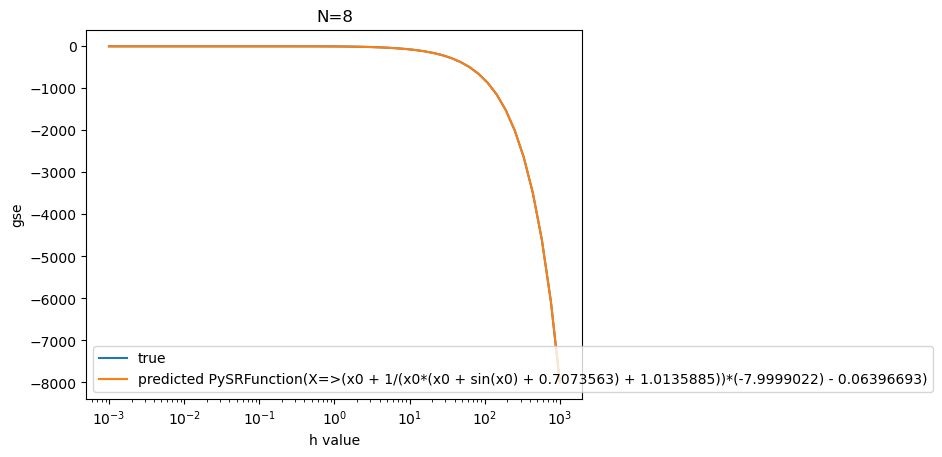

In [14]:
plt.plot(h_values, gses, label = 'true')
plt.plot(h_values, model_function(h_values), label = f'predicted {model_function}')
plt.xlabel('h value')
plt.xscale('log')
plt.ylabel('gse')
plt.legend(loc = 'best')
plt.title(f'N={N}')
plt.show()

C:\Users\taoha\AppData\Local\Temp\ipykernel_14180\1784204533.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


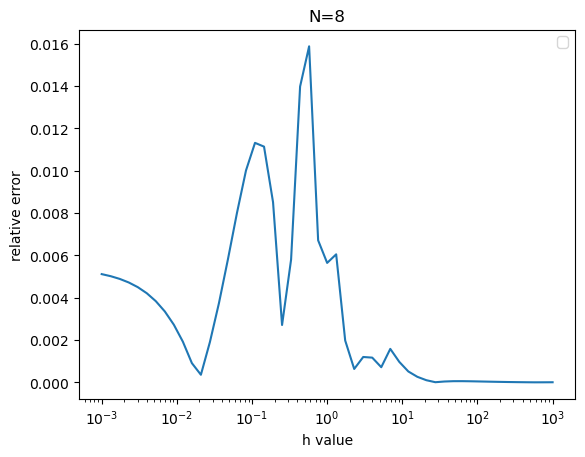

In [15]:
pred = model_function(h_values)
errors = abs((pred - gses) / gses)
plt.plot(h_values, errors)
plt.xlabel('h value')
plt.xscale('log')
plt.ylabel('relative error')
plt.legend(loc = 'best')
plt.title(f'N={N}')
plt.show()


In [8]:
h_value_model_2 = PySRRegressor(
    maxsize=20,
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "log10",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [12]:
h_value_model_2.fit(h_values, gses)

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.390e+05
Progress: 760 / 1240 total iterations (61.290%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.529e+06  0.000e+00  y = -653.45
3           2.582e+01  5.660e+00  y = x₀ * -8
5           1.027e+01  4.612e-01  y = (x₀ + 0.53281) * -7.9925
7           1.027e+01  1.937e-06  y = ((x₀ + 0.47306) * -7.9925) + -0.47928
8           3.954e-01  3.257e+00  y = (inv(x₀ + 1.0225) + x₀) * -7.9999
10          9.175e-02  7.305e-01  y = (x₀ + inv((x₀ + 0.97153) + x₀)) * -8
12          9.991e-03  1.109e+00  y = (x₀ + inv((x₀ * (x₀ + 1.0343)) + 0.99942)) * -8
14          7.651e-03  1.334e-01  y = (x₀ + inv((x₀ * (x₀ * 1.3981)) + (x₀ + 0.99942))) * -8
16          5.022e-03  2.105e-01  y = ((inv((x₀ * (x₀ + 0.35856)) + 0.51194) + (x₀ + x₀)) + ...
          

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          -653.4461   
	1         5.746003                                     x0 * -8.000026   
	2         0.461174                     (x0 + 0.53281313) * -7.9925404   
	3         0.000002      ((x0 + 0.47306046) * -7.992537) + -0.47928247   
	4         3.256716             (inv(x0 + 1.0224298) + x0) * -7.999943   
	5         0.746280  (inv((x0 * 1.8836333) + 0.9754218) + x0) * -7....   
	6         0.451216  (sin(inv((x0 + x0) + 0.68788785)) + x0) * -7.9...   
	7         1.831961  (x0 + inv((x0 * (x0 + 1.10494)) + 0.995873)) *...   
	8         0.181898  (inv((x0 + 0.9979729) + (x0 * (x0 * 1.2553027)...   
	9   >>>>  0.219688  ((inv((x0 + (x0 * (x0 * 1.4025086))) + 1.00992...   
	10        0.107440  (x0 + -0.10277201) + ((inv(((x0 * (x0 * 1.7404...   
	11        0.009422  (((inv((x0 * (x0 + ((x0 * -0.20109001) + 0.433...   
	
	            loss  complexity  
	0   2.528889e+06           1  
	1   2.582347e+01           3  
	2   1.026700e+01           5  
	3   1.026695e+01           7  
	4   3.954284e-01           8  
	5   8.889086e-02          10  
	6   5.661042e-02          11  
	7   9.063294e-03          12  
	8   6.299282e-03          14  
	9   4.059498e-03          16  
	10  3.274549e-03          18  
	11  3.213422e-03          20  
]

  - outputs\20250609_122938_O4Fufn\hall_of_fame.csv


In [13]:
h_value_model_2.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,2.528889e+06,-653.4461,0.000000,-653.446100000000,PySRFunction(X=>-653.446100000000)
1,3,2.582347e+01,x0 * -8.000026,5.746003,x0*(-8.000026),PySRFunction(X=>x0*(-8.000026))
2,5,1.026700e+01,(x0 + 0.53281313) * -7.9925404,0.461174,(x0 + 0.53281313)*(-7.9925404),PySRFunction(X=>(x0 + 0.53281313)*(-7.9925404))
3,7,1.026695e+01,((x0 + 0.47306046) * -7.992537) + -0.47928247,0.000002,(x0 + 0.47306046)*(-7.992537) - 0.47928247,PySRFunction(X=>(x0 + 0.47306046)*(-7.992537) ...
4,8,3.954284e-01,(inv(x0 + 1.0224298) + x0) * -7.999943,3.256716,(x0 + 1/(x0 + 1.0224298))*(-7.999943),PySRFunction(X=>(x0 + 1/(x0 + 1.0224298))*(-7....
5,10,8.889086e-02,(inv((x0 * 1.8836333) + 0.9754218) + x0) * -7....,0.746280,(x0 + 1/(x0*1.8836333 + 0.9754218))*(-7.9999785),PySRFunction(X=>(x0 + 1/(x0*1.8836333 + 0.9754...
6,11,5.661042e-02,(sin(inv((x0 + x0) + 0.68788785)) + x0) * -7.9...,0.451216,(x0 + sin(1/(x0 + x0 + 0.68788785)))*(-7.9999785),PySRFunction(X=>(x0 + sin(1/(x0 + x0 + 0.68788...
7,12,9.063294e-03,(x0 + inv((x0 * (x0 + 1.10494)) + 0.995873)) *...,1.831961,(x0 + 1/(x0*(x0 + 1.10494) + 0.995873))*(-8.00...,PySRFunction(X=>(x0 + 1/(x0*(x0 + 1.10494) + 0...
8,14,6.299282e-03,(inv((x0 + 0.9979729) + (x0 * (x0 * 1.2553027)...,0.181898,(x0 + 1/(x0 + x0*x0*1.2553027 + 0.9979729))*(-...,PySRFunction(X=>(x0 + 1/(x0 + x0*x0*1.2553027 ...
9,16,4.059498e-03,((inv((x0 + (x0 * (x0 * 1.4025086))) + 1.00992...,0.219688,(x0 + 1/(x0 + x0*x0*1.4025086 + 1.0099274))*(-...,PySRFunction(X=>(x0 + 1/(x0 + x0*x0*1.4025086 ...


In [18]:
h_value_model_2.equations_['sympy_format'][9]

(x0 + 1/(x0 + x0*x0*1.4025086 + 1.0099274))*(-7.9998517) - 0.093122825

In [33]:
n_values = np.arange(8, 20 + 2, 2)
h_values = np.logspace(-3, 3, 51)
data = np.array([[N, h] for h in h_values for N in n_values])
gses = np.array([tfim_functions.ground_state_energy(h, N) for N, h in data])
print(n_values.shape, h_values.shape, data.shape, gses.shape)

(7,) (51,) (357, 2) (357,)


In [34]:
model_N_h = PySRRegressor(
    maxsize=20,
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [35]:
model_N_h.fit(data, gses)
# model_N_h = PySRRegressor.from_file(run_directory='202050609_131917_U3O4Fu')

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.580e+05
Progress: 1192 / 1240 total iterations (96.129%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.484e+06  0.000e+00  y = -1143.4
3           7.390e+05  9.499e-01  y = x₁ * -14
5           8.552e+01  4.500e+00  y = (x₀ * -1) * x₁
7           3.403e+01  4.607e-01  y = (x₀ * (x₁ + 0.53275)) * -0.99907
9           3.403e+01  8.941e-07  y = (((x₁ + 0.53226) * -0.99907) * x₀) + -0.014875
10          1.328e+00  3.243e+00  y = (x₀ * -0.99999) * (inv(x₁ + 1.0226) + x₁)
12          3.002e-01  7.436e-01  y = ((x₁ * -1) + inv((x₁ * -1.8906) + -0.97526)) * x₀
14          3.327e-02  1.100e+00  y = x₀ * ((inv((x₁ * (x₁ + 1.1121)) + 0.99563) + x₁) * -1)
16          2.085e-02  2.336e-01  y = x₀ * ((x₁ * -1) + inv(((x₁ * (x₁ + 0.63243)) * -1.4169...
   

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         -1143.3734   
	1         1.220278                                    x1 * -14.000042   
	2         4.532201                             (x0 * -1.0000036) * x1   
	3         0.460702              (x0 * (x1 + 0.5327491)) * -0.99906754   
	4         0.000003  (((x1 + 0.53225976) * -0.9990676) * x0) + -0.0...   
	5         3.243416     (x0 * (x1 + inv(x1 + 1.0226789))) * -0.9999927   
	6         0.743553  ((x1 * -0.9999973) + inv((x1 * -1.8906348) + -...   
	7         1.099895  x0 * ((inv((x1 * (x1 + 1.112142)) + 0.9956254)...   
	8         0.233598  x0 * ((x1 * -1.0000019) + inv(((x1 * (x1 + 0.6...   
	9   >>>>  0.488145  ((inv((x1 * ((sin(x1) + 0.67200655) + x1)) + 1...   
	10        0.068583  ((-0.012679092 + (x1 * -0.9999797)) + inv((x1 ...   
	11        0.133843  x0 * ((inv(((((x1 + sin(x1)) * 0.8911231) + 0....   
	
	            loss  complexity  
	0   8.483683e+06           1  
	1   7.390334e+05           3  
	2   8.551547e+01           5  
	3   3.403173e+01           7  
	4   3.403154e+01           9  
	5   1.328262e+00          10  
	6   3.002216e-01          12  
	7   3.327246e-02          14  
	8   2.085374e-02          16  
	9   1.279927e-02          17  
	10  1.195088e-02          18  
	11  1.045376e-02          19  
]

  - outputs\20250609_131917_U3O4Fu\hall_of_fame.csv


In [36]:
model_N_h.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,8.483683e+06,-1143.3734,0.000000,-1143.37340000000,PySRFunction(X=>-1143.37340000000)
1,3,7.390334e+05,x1 * -14.000042,1.220278,x1*(-14.000042),PySRFunction(X=>x1*(-14.000042))
2,5,8.551547e+01,(x0 * -1.0000036) * x1,4.532201,x0*(-1.0000036)*x1,PySRFunction(X=>x0*(-1.0000036)*x1)
3,7,3.403173e+01,(x0 * (x1 + 0.5327491)) * -0.99906754,0.460702,x0*(x1 + 0.5327491)*(-0.99906754),PySRFunction(X=>x0*(x1 + 0.5327491)*(-0.999067...
4,9,3.403154e+01,(((x1 + 0.53225976) * -0.9990676) * x0) + -0.0...,0.000003,(x1 + 0.53225976)*(-0.9990676)*x0 - 0.014875465,PySRFunction(X=>(x1 + 0.53225976)*(-0.9990676)...
5,10,1.328262e+00,(x0 * (x1 + inv(x1 + 1.0226789))) * -0.9999927,3.243416,x0*(x1 + 1/(x1 + 1.0226789))*(-0.9999927),PySRFunction(X=>x0*(x1 + 1/(x1 + 1.0226789))*(...
6,12,3.002216e-01,((x1 * -0.9999973) + inv((x1 * -1.8906348) + -...,0.743553,x0*(x1*(-0.9999973) + 1/(x1*(-1.8906348) - 0.9...,PySRFunction(X=>x0*(x1*(-0.9999973) + 1/(x1*(-...
7,14,3.327246e-02,x0 * ((inv((x1 * (x1 + 1.112142)) + 0.9956254)...,1.099895,x0*(x1 + 1/(x1*(x1 + 1.112142) + 0.9956254))*(...,PySRFunction(X=>x0*(x1 + 1/(x1*(x1 + 1.112142)...
8,16,2.085374e-02,x0 * ((x1 * -1.0000019) + inv(((x1 * (x1 + 0.6...,0.233598,x0*(x1*(-1.0000019) + 1/(x1*(x1 + 0.6324276)*(...,PySRFunction(X=>x0*(x1*(-1.0000019) + 1/(x1*(x...
9,17,1.279927e-02,((inv((x1 * ((sin(x1) + 0.67200655) + x1)) + 1...,0.488145,(x1 + 1/(x1*(x1 + sin(x1) + 0.67200655) + 1.00...,PySRFunction(X=>(x1 + 1/(x1*(x1 + sin(x1) + 0....


In [38]:
model_N_h.equations_['sympy_format'][9]

(x1 + 1/(x1*(x1 + sin(x1) + 0.67200655) + 1.0061134))*(-1.0000019)*x0

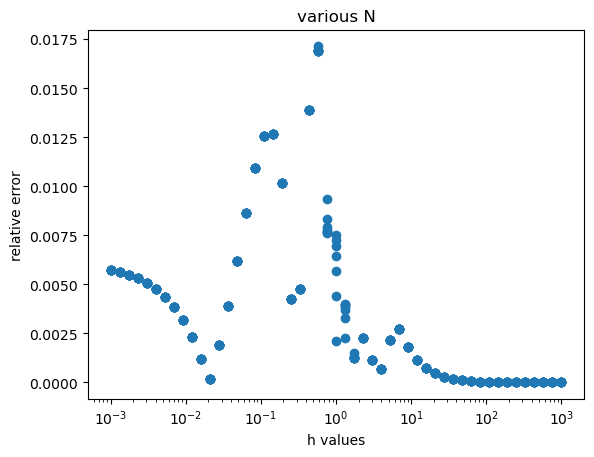

In [41]:
pred = model_N_h.equations_['lambda_format'][9](data)
errors = abs((pred - gses) / gses)
plt.scatter(data[:, 1], errors)
plt.xlabel('h values')
plt.ylabel('relative error')
plt.xscale('log')
plt.title('various N')
plt.show()

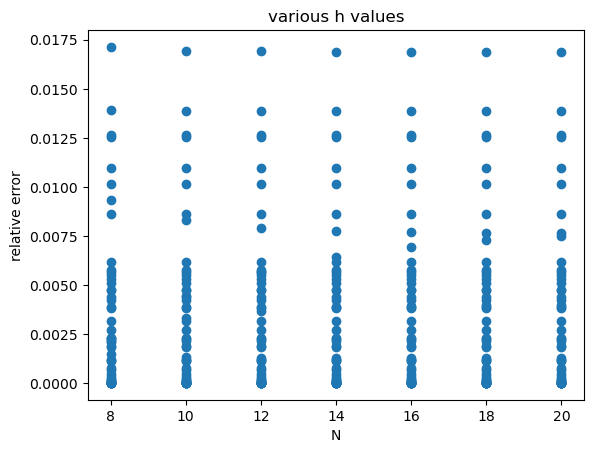

In [42]:
pred = model_N_h.equations_['lambda_format'][9](data)
errors = abs((pred - gses) / gses)
plt.scatter(data[:, 0], errors)
plt.xlabel('N')
plt.ylabel('relative error')
plt.title('various h values')
plt.show()

In [79]:
n_values = [6, 7, 8, 9]
num_h = 41
h_values = np.logspace(-1, 1, num_h)
data = np.array([[N, h] for N in n_values for h in h_values])
gs_0 = np.array([abs(tfim_functions.TFIM_hamiltonian(round(N), 1, h).eigenstates()[1][0][0][0]) ** 2 for N, h in data])

In [80]:
data

array([[ 6.        ,  0.1       ],
       [ 6.        ,  0.11220185],
       [ 6.        ,  0.12589254],
       [ 6.        ,  0.14125375],
       [ 6.        ,  0.15848932],
       [ 6.        ,  0.17782794],
       [ 6.        ,  0.19952623],
       [ 6.        ,  0.22387211],
       [ 6.        ,  0.25118864],
       [ 6.        ,  0.28183829],
       [ 6.        ,  0.31622777],
       [ 6.        ,  0.35481339],
       [ 6.        ,  0.39810717],
       [ 6.        ,  0.44668359],
       [ 6.        ,  0.50118723],
       [ 6.        ,  0.56234133],
       [ 6.        ,  0.63095734],
       [ 6.        ,  0.70794578],
       [ 6.        ,  0.79432823],
       [ 6.        ,  0.89125094],
       [ 6.        ,  1.        ],
       [ 6.        ,  1.12201845],
       [ 6.        ,  1.25892541],
       [ 6.        ,  1.41253754],
       [ 6.        ,  1.58489319],
       [ 6.        ,  1.77827941],
       [ 6.        ,  1.99526231],
       [ 6.        ,  2.23872114],
       [ 6.        ,

In [81]:
gs_0

array([0.49812309, 0.49763643, 0.49702333, 0.49625074, 0.49527684,
       0.49404861, 0.49249862, 0.49054072, 0.4880642 , 0.48492559,
       0.4809367 , 0.47584688, 0.46931578, 0.46087138, 0.44984647,
       0.43529108, 0.41588238, 0.38993527, 0.35579451, 0.31301057,
       0.26404086, 0.21448378, 0.17027471, 0.13453872, 0.10730361,
       0.08705844, 0.07205402, 0.06083576, 0.05233016, 0.04577993,
       0.04065732, 0.03659316, 0.03332638, 0.03066966, 0.02848649,
       0.02667589, 0.02516202, 0.0238871 , 0.02280658, 0.02188565,
       0.02109682, 0.49781122, 0.49724393, 0.49652955, 0.4956297 ,
       0.49449613, 0.49306777, 0.49126741, 0.48899713, 0.48613239,
       0.48251394, 0.4779365 , 0.47213223, 0.46474531, 0.4552912 ,
       0.44308971, 0.42715759, 0.40605753, 0.37778026, 0.34001644,
       0.29166186, 0.23580928, 0.18066833, 0.134403  , 0.0998765 ,
       0.07555103, 0.05864468, 0.04677764, 0.03828179, 0.03206157,
       0.02740674, 0.02385267, 0.02108987, 0.01890781, 0.01716

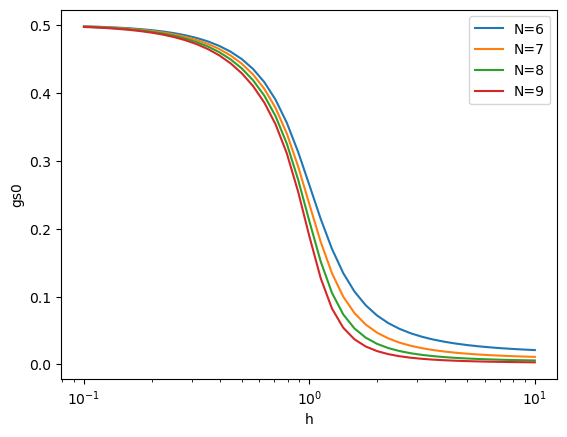

In [82]:
for i, v in enumerate(n_values):
    plt.plot(h_values, gs_0[num_h * i: num_h * (i + 1)], label = f'N={v}')
plt.xlabel('h')
plt.xscale('log')
plt.ylabel('gs0')
plt.legend(loc = 'best')
plt.show()
# it seems that for larger N, both eigenstates() and la.eig fail to find the symmetric ground state for h<<1

In [96]:
model_gs_0 = PySRRegressor(
    maxsize=20,
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*", '-', '/'],
    unary_operators=[
        "exp",
        "inv(x) = 1/x",
        "gaussian(x) = exp(-1*x^2)"
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x, "gaussian": lambda x: sympy.exp(-x * x)},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [ ]:
model_gs_0.fit(data, gs_0)
# model_gs_0 = PySRRegressor.from_file('outputs/20250609_134839_YnPFpY')

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.590e+05
Progress: 929 / 1240 total iterations (74.919%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.415e-02  0.000e+00  y = 0.24505
3           2.292e-02  3.278e-01  y = 0.082795 / x₁
4           8.188e-04  3.332e+00  y = gaussian(x₁) * 0.53053
6           3.814e-04  3.821e-01  y = gaussian(0.14139 - x₁) * 0.49523
7           3.106e-04  2.051e-01  y = gaussian(x₁ - inv(x₀)) * 0.49651
8           2.826e-04  9.472e-02  y = (gaussian(x₁ - 0.11841) * 0.48194) - -0.015657
9           2.200e-04  2.501e-01  y = (gaussian(x₁ - inv(x₀)) * 0.48035) - -0.014161
11          2.139e-04  1.413e-02  y = (gaussian(inv(x₀) - (x₁ - -0.017349)) * 0.48235) - -0....
                                      015436
12          1.693e-04  2.340e-01  y = (gaussian(((0

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                         0.24505319   
	1        0.327850                                   0.082794756 / x1   
	2        3.331891                          gaussian(x1) * 0.53053397   
	3        0.382053             gaussian(0.14139476 - x1) * 0.49522847   
	4        0.205127                gaussian(x1 - inv(x0)) * 0.49650532   
	5        0.094722  (gaussian(0.11841599 - x1) * 0.4819382) - -0.0...   
	6        0.250087  (gaussian(x1 - inv(x0)) * 0.48035437) - -0.014...   
	7        0.014128  (gaussian(inv(x0) - (x1 - -0.017348958)) * 0.4...   
	8        0.238215  (gaussian((0.20410053 - x1) * (x0 * -0.1504953...   
	9  >>>>  0.241011  (gaussian(((x0 + 4.634026) * (0.18409318 - x1)...   
	
	       loss  complexity  
	0  0.044154           1  
	1  0.022919           3  
	2  0.000819           4  
	3  0.000381           6  
	4  0.000311           7  
	5  0.000283           8  
	6  0.000220           9  
	7  0.000214          11  
	8  0.000169          12  
	9  0.000104          14  
]

In [98]:
model_gs_0.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,0.044154,0.24505319,0.000000,0.245053190000000,PySRFunction(X=>0.245053190000000)
1,3,0.022919,0.082794756 / x1,0.327850,0.082794756/x1,PySRFunction(X=>0.082794756/x1)
2,4,0.000819,gaussian(x1) * 0.53053397,3.331891,exp(-x1**2)*0.53053397,PySRFunction(X=>exp(-x1**2)*0.53053397)
3,6,0.000381,gaussian(0.14139476 - x1) * 0.49522847,0.382053,exp((0.14139476 - x1)*(x1 - 0.14139476))*0.495...,PySRFunction(X=>exp((0.14139476 - x1)*(x1 - 0....
4,7,0.000311,gaussian(x1 - inv(x0)) * 0.49650532,0.205127,exp((-x1 + 1/x0)*(x1 - 1/x0))*0.49650532,PySRFunction(X=>exp((-x1 + 1/x0)*(x1 - 1/x0))*...
5,8,0.000283,(gaussian(0.11841599 - x1) * 0.4819382) - -0.0...,0.094722,exp((0.11841599 - x1)*(x1 - 0.11841599))*0.481...,PySRFunction(X=>exp((0.11841599 - x1)*(x1 - 0....
6,9,0.000220,(gaussian(x1 - inv(x0)) * 0.48035437) - -0.014...,0.250087,exp((-x1 + 1/x0)*(x1 - 1/x0))*0.48035437 - 1*(...,PySRFunction(X=>exp((-x1 + 1/x0)*(x1 - 1/x0))*...
7,11,0.000214,(gaussian(inv(x0) - (x1 - -0.017348958)) * 0.4...,0.014128,exp((-(x1 - 1*(-0.017348958)) + 1/x0)*(x1 + 0....,PySRFunction(X=>exp((-(x1 - 1*(-0.017348958)) ...
8,12,0.000169,(gaussian((0.20410053 - x1) * (x0 * -0.1504953...,0.238215,0.017713394 + exp(-0.0226488503716225*x0**2*(0...,PySRFunction(X=>0.017713394 + exp(-0.022648850...
9,14,0.000104,(gaussian(((x0 + 4.634026) * (0.18409318 - x1)...,0.241011,(-1*(-0.03704733) + exp(-0.0081944714638224*(0...,PySRFunction(X=>(-1*(-0.03704733) + exp(-0.008...


In [100]:
model_gs_0.equations_['sympy_format'][6]

exp((-x1 + 1/x0)*(x1 - 1/x0))*0.48035437 - 1*(-0.01416098)

In [102]:
model_gs_0.equations_['sympy_format'][8]

0.017713394 + exp(-0.0226488503716225*x0**2*(0.20410053 - x1)**2)*0.4739933

In [113]:
model_gs_0.equations_['sympy_format'][9]

(-1*(-0.03704733) + exp(-0.0081944714638224*(0.18409318 - x1)**2*21.474196968676*(0.215795077541645*x0 + 1)**2))*0.4759161

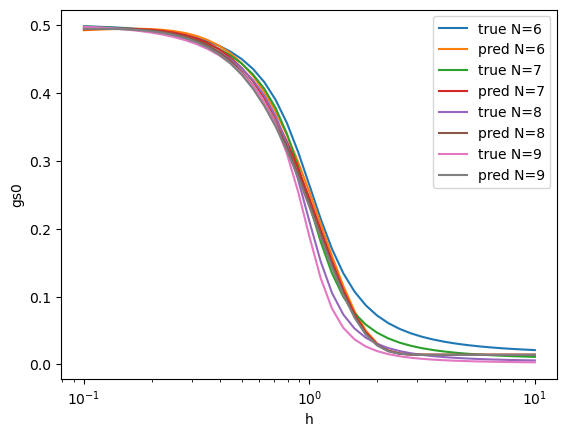

In [111]:
pred = model_gs_0.equations['lambda_format'][6](data)
for i, v in enumerate(n_values):
    plt.plot(h_values, gs_0[num_h * i: num_h * (i + 1)], label = f'true N={v}')
    plt.plot(h_values, pred[num_h * i: num_h * (i + 1)], label = f'pred N={v}')
plt.xlabel('h')
plt.xscale('log')
plt.ylabel('gs0')
plt.legend(loc = 'best')
plt.show()

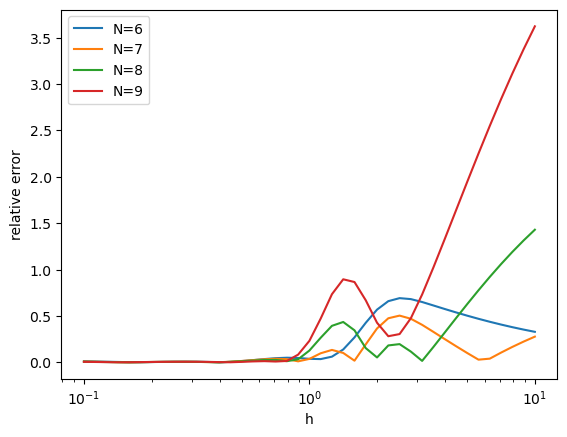

In [112]:
pred = model_gs_0.equations['lambda_format'][6](data)
for i, v in enumerate(n_values):
    errors = abs((pred[num_h * i: num_h * (i + 1)] - gs_0[num_h * i: num_h * (i + 1)]) / gs_0[num_h * i: num_h * (i + 1)])
    plt.plot(h_values, errors, label = f'N={v}')
plt.xlabel('h')
plt.xscale('log')
plt.ylabel('relative error')
plt.legend(loc = 'best')
plt.show()